In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.fft import *

In [7]:
csv_file_path = '/home/cc/clio/runs/raw/tencent/characteristic/1063/1m/characteristic.csv'
df_data = pd.read_csv(csv_file_path)
df_data

,num_io,start_time,end_time,ts_unit,duration,read_count,write_count,read_ratio,write_ratio,read_write_ratio,...,write_iat_p60,write_iat_p70,write_iat_p75,write_iat_p80,write_iat_p90,write_iat_p95,write_iat_p99,write_iat_p999,write_iat_p9999,write_iat_p100
0,44447,2.016100e+00,5.999894e+04,ms,59996.9210,34562,9885,0.7776,0.2224,3.4964,...,3.729411,4.979147e+00,5.848400e+00,6.968832e+00,1.098852e+01,1.596411e+01,5.030692e+01,7.842878e+02,1.282984e+03,1.282984e+03
1,39680,6.000000e+04,1.200000e+05,ms,59999.9955,30502,9178,0.7687,0.2313,3.3234,...,2.945059,3.725814e+00,4.258084e+00,4.950336e+00,7.663061e+00,1.241583e+01,8.160057e+01,1.343748e+03,2.195862e+03,2.195862e+03
2,54722,1.200000e+05,1.799998e+05,ms,59999.7992,41966,12756,0.7669,0.2331,3.2899,...,2.796691,3.563230e+00,4.093643e+00,4.786423e+00,7.564615e+00,1.211197e+01,4.439708e+01,6.563327e+02,1.569220e+03,1.569220e+03
3,60007,1.800000e+05,2.399997e+05,ms,59999.7043,42857,17150,0.7142,0.2858,2.4990,...,2.620251,3.331978e+00,3.795400e+00,4.382209e+00,6.372092e+00,8.842269e+00,1.951834e+01,2.683413e+02,1.615427e+03,1.615427e+03
4,61624,2.400000e+05,2.999997e+05,ms,59999.6803,45108,16516,0.7320,0.2680,2.7312,...,3.073399,3.934619e+00,4.516861e+00,5.253314e+00,7.810037e+00,1.087408e+01,2.038680e+01,1.308700e+02,7.615399e+02,7.615399e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12889,12520,7.809600e+08,7.810190e+08,ms,59000.0000,10473,2047,0.8365,0.1635,5.1163,...,3.703440,5.924520e+00,7.978352e+00,1.178055e+01,4.228474e+01,1.423808e+02,1.083190e+03,2.051264e+03,2.082979e+03,2.082979e+03
12890,1008,7.810200e+08,7.810790e+08,ms,59003.7286,874,134,0.8671,0.1329,6.5224,...,280.163417,5.553309e+02,7.391129e+02,9.988252e+02,1.349384e+03,1.828370e+03,1.999763e+03,1.999771e+03,1.999771e+03,1.999776e+03
12891,2777,7.810800e+08,7.811394e+08,ms,59350.9745,2417,360,0.8704,0.1296,6.7139,...,38.923921,8.517947e+01,1.325346e+02,2.182924e+02,6.989813e+02,1.277835e+03,2.050381e+03,2.064848e+03,2.064848e+03,2.064848e+03
12892,35835,7.811400e+08,7.811998e+08,ms,59787.1000,26245,9590,0.7324,0.2676,2.7367,...,3.003849,3.766748e+00,4.260622e+00,4.888941e+00,7.348472e+00,1.204780e+01,8.057535e+01,1.183762e+03,1.835652e+03,1.835652e+03


In [8]:
categories = ['iops', 'read_write_ratio']
start_index = 1000
end_index = 2000

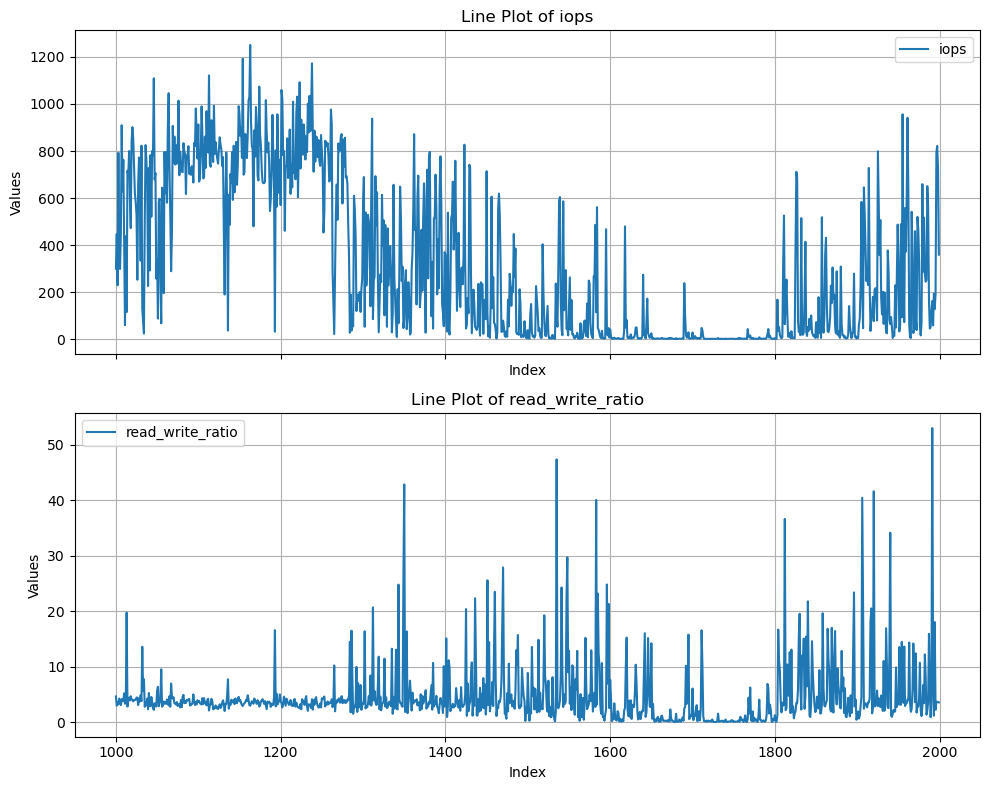

In [9]:
fig, axs = plt.subplots(len(categories), 1, figsize=(10, 8), sharex=True)

# Iterate through each category and plot in separate subplot
for idx, category in enumerate(categories):
    data = df_data[category].iloc[start_index:end_index]  # Slice data for the current category
    axs[idx].plot(data.index, data.values, label=category)
    axs[idx].set_title(f'Line Plot of {category}')
    axs[idx].set_xlabel('Index')
    axs[idx].set_ylabel('Values')
    axs[idx].legend()
    axs[idx].grid(True)

plt.tight_layout()
plt.show()

In [10]:
def filter_signal(signal, threshold=1e8):
    fourier = rfft(signal)
    frequencies = rfftfreq(signal.size, d=20e-3/signal.size)
    fourier[frequencies > threshold] = 0
    return irfft(fourier)

In [11]:
# signal = df_data['iops'].iloc[start_index:end_index].reset_index(drop=True)
# filtered = filter_signal(signal, threshold=1e3)

In [48]:
signal = df_data['iops'].iloc[start_index:end_index].reset_index(drop=True)

filtered = filter_signal(df_data['iops'], threshold=40000)
filtered_data = filtered[start_index:end_index]

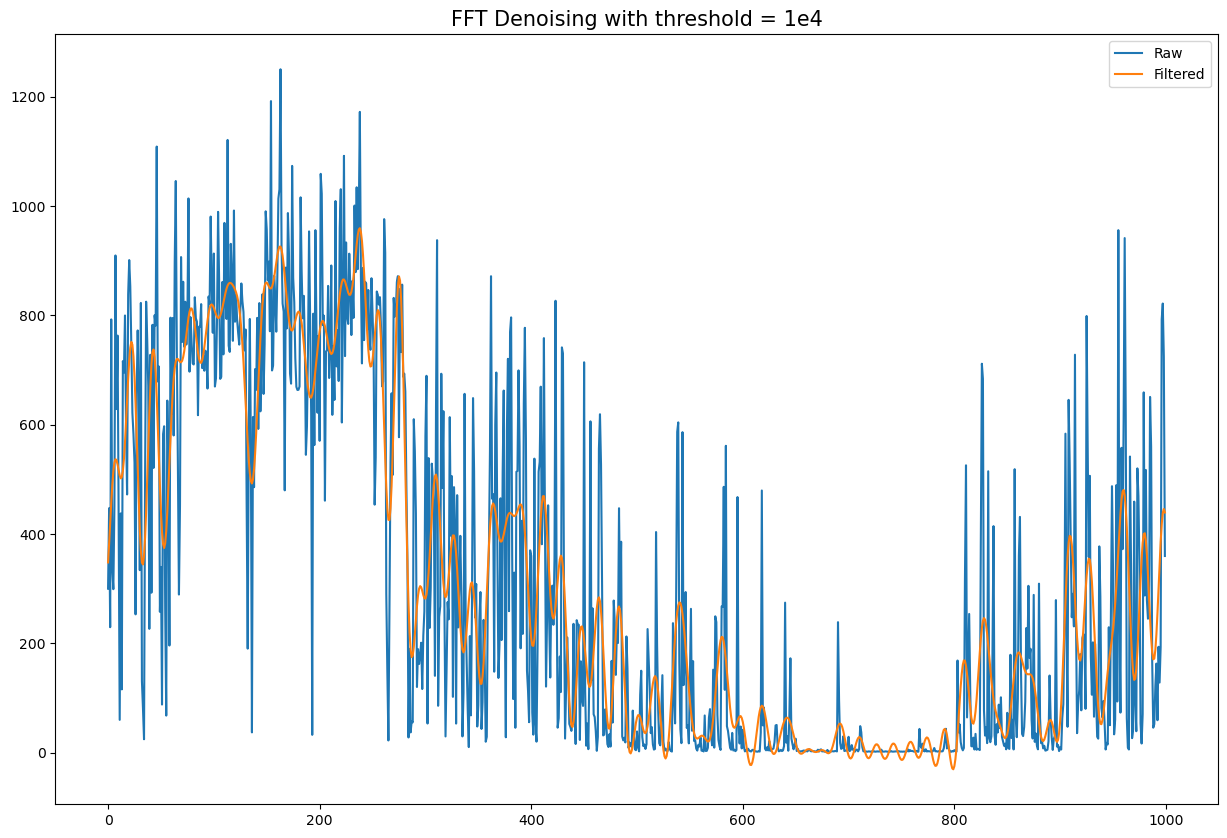

In [49]:
plt.figure(figsize=(15, 10))
plt.plot(signal, label='Raw')
plt.plot(filtered_data, label='Filtered')
plt.legend()
plt.title("FFT Denoising with threshold = 1e4", size=15)
plt.show()